## 2-2. 파이썬의 HTML Parser, BeautifulSoup

- HTML 분석기인 BeautifulSoup에 대해서 알아봅시다.

### BeautifulSoup 라이브러리

지난 실습들에서 저희는 `requests` 모듈을 이용해서 HTTP 요청을 보내고, 이 응답을 받아 여러 요소를 살펴보았습니다.  
그런데, `res.body`를 해보았을 때 문제점이 있었습니다. 바로 해당 내용이 아주 긴 텍스트로 와서 분석하기 힘들다는 것이 바로 그것인데요,  
  
**저희가 원하는 요소만을 가져올 수 있으면 얼마나 좋을까요?**  
이를 가능하도록 HTML 코드를 **분석**해주는, HTML Parser를 사용할 수 있습니다. 그 중에서 가장 유명한 것이 바로 오늘 저희가 사용할 `BeautifulSoup4`입니다.  

우선, 이를 사용하기 위해서 `pip`를 사용해 다운로드를 받아봅시다.

> Tip: `%`를 이용해서 노트북(.ipynb) 환경에서 터미널 코드를 실행할 수 있습니다.

In [1]:
# %pip install bs4

설치를 다 진행했다면, 이제 `BeautifulSoup4` 모듈을 사용할 준비가 되었습니다.

이제 이를 바탕으로 HTTP 코드를 분석해 원하는 정보만을 얻으러 가볼까요?

### BeautifulSoup 객체 만들기

In [2]:
# www.example.com 사이트를 요청한 후 응답 받아보기

import requests

res = requests.get("https://www.naver.com")
res

<Response [200]>

저희가 지난 시간까지 다음과 같은 방법을 통해 요청을 보내고 응답을 받았는데요,

이렇게 받은 `res`를 그대로 사용하지 말고, HTML parser에 전달해봅시다.

In [3]:
# BeautifulSoup4 - bs4를 불러와봅시다.

from bs4 import BeautifulSoup

이렇게 불러온 bs4를 사용하기 위해선, BeautifulSoup 객체를 생성해주어야합니다.

In [4]:
# BeautifulSoup객체를 만들어봅시다.
# 첫번째 인자로는 response의 body를 텍스트로 전달합니다.
# 두번째 인자로는 "html"로 분석한다는 것을 명시해줍니다.

soup = BeautifulSoup(res.text, "html.parser")

이 soup은 HTML 정보를 분석해서 가지고 있습니다. 이를 확인해볼까요?

<!DOCTYPE html>
<html data-dark="false" lang="ko">
 <head>
  <meta charset="utf-8"/>
  <title>
   NAVER
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=1190" name="viewport"/>
  <meta content="NAVER" name="apple-mobile-web-app-title">
   <meta content="index,nofollow" name="robots">
    <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
     <meta content="네이버" property="og:title"/>
     <meta content="https://www.naver.com/" property="og:url"/>
     <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
     <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
      <meta content="summary" name="twitter:card"/>
      <meta content="" name="twitter:title"/>
      <meta content="https://www.naver.com/" name="twitter:url"/>
      <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/
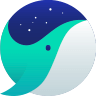
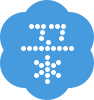

In [5]:
# 객체 soup의 .prettify()를 활용하면 분석된 HTML을 보기 편하게 반환해줍니다.

print(soup.prettify())

HTML이 들여쓰기가 되어 예쁘게 출력된 것을 확인할 수 있습니다.

이 `soup` 객체를 통해서 우리는 HTML의 특정 요소를 가지고 올 수 있습니다.

In [6]:
# title 가져오기

soup.title

<title>NAVER</title>

In [7]:
# head 가져오기

soup.head

<head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:description"> <link href="https://pm.pstatic.net/dist/c

<body> <div id="u_skip"> <a href="#newsstand"><span>뉴스스탠드 바로가기</span></a> <a href="#themecast"><span>주제별캐스트 바로가기</span></a> <a href="#timesquare"><span>타임스퀘어 바로가기</span></a> <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a> <a href="#account"><span>로그인 바로가기</span></a> </div> <div id="wrap"> <style>._1syGnXOL{padding-right:18px;font-size:14px;line-height:0;letter-spacing:-.25px;color:#000}._1syGnXOL span,._1syGnXOL strong{line-height:49px}._1syGnXOL:before{display:inline-block;content:"";vertical-align:top;background-image:url(https://static-whale.pstatic.net/main/sprite-20220527@2x.png);background-repeat:no-repeat;background-size:141px 112px;width:18px;height:18px;margin:16px 8px 0 0;background-position:-98px 0}[data-useragent*="MSIE 8"] ._1syGnXOL:before{background-image:url(https://static-whale.pstatic.net/main/sprite-20220527.png)}._1syGnXOL._3dsvmZg2:before{background-position:-47px -85px}._1syGnXOL._1NBFx1WK:before{width:20px;height:20px;margin:15px 8px 0 0;background-position:-21px
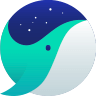
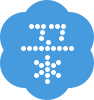

In [8]:
# body 가져오기

soup.body

In [9]:
# <h1> 태그로 감싸진 요소 하나 찾기

h1 = soup.find("h1")
h1

<h1 class="logo_default">
<a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>
</h1>

만약 태그를 많이 가지고오고싶다면 어떻게 해야할까요?

In [10]:
# <p> 태그로 감싸진 요소들 찾기

soup.find_all("p")

[<p class="dsc">
 <i class="imsc ico_election"></i><span class="_alert_passage"></span>
 </p>,
 <p class="dsc">ON/OFF 설정은<br/>해당기기(브라우저)에 저장됩니다.</p>,
 <p class="dsc"><em class="txt">동일한 시간대/연령/남녀별</em> 사용자 그룹의<br/>관심사에 맞춰 자동완성을 제공합니다.</p>,
 <p class="popup_msg">해당 언론사 사정으로 접근이 제한됩니다.</p>,
 <p class="popup_msg"><strong class="NM_NEWSSTAND_POPUP_PNAME"></strong>을(를)<br/>구독해지 하시겠습니까?</p>,
 <p class="toast_msg">구독한 언론사에 추가되었습니다.</p>,
 <p class="popup_msg">해당 언론사 사정으로 접근이 제한됩니다.</p>,
 <p class="popup_msg"><strong class="NM_NEWSSTAND_POPUP_PNAME"></strong>을(를)<br>구독해지 하시겠습니까?</br></p>,
 <p class="toast_msg">구독한 언론사에 추가되었습니다.</p>,
 <p class="popup_msg">해당 언론사 사정으로 접근이 일시 제한됩니다.</p>,
 <p class="popup_msg"><strong class="NM_NEWSSTAND_POPUP_PNAME"></strong>을(를)<br/>구독해지 하시겠습니까?</p>,
 <p class="popup_msg">해당 언론사 사정으로 접근이 제한됩니다.</p>,
 <p class="popup_msg"><strong class="NM_NEWSSTAND_POPUP_PNAME"></strong>을(를)<br/>구독해지 하시겠습니까?</p>,
 <p class="dsc_msg">언론사 구독 설정에서 관심있는 언론사를 구독하시면<br/>언론사가 직접 편집한 뉴스들

In [11]:
# 태그 이름 가져오기

h1.name

'h1'

In [12]:
# 태그 내용 가져오기

h1.text

'\n네이버\n'